In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from copy import deepcopy
from operator import index
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# done by us
from auxFunctions import *

In [2]:
df = pd.read_csv('Proj1_Dataset.csv')

for feature in df.columns:
  df = df[df[feature].notna()]
  
df_features = df.drop(['Date','Time','Persons'], axis=1)

df_output = df['Persons']


# Z-Score

In [3]:
standard = StandardScaler().fit_transform(df_features.values)

project_df = pd.DataFrame(standard, index=df_features.index, columns=df_features.columns)


# Temperature

/tmp/ipykernel_283135/1429151312.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
/tmp/ipykernel_283135/1429151312.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)


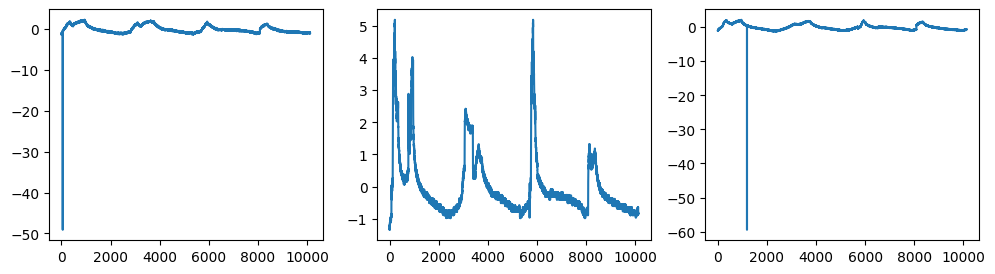

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(12, 3))
plt.subplot(1,3,1)
project_df.S1Temp.plot()
plt.subplot(1,3,2)
project_df.S2Temp.plot(ax=plt.gca())
plt.subplot(1,3,3)
project_df.S3Temp.plot(ax=plt.gca())
plt.show()

# Light

/tmp/ipykernel_283135/955311149.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
/tmp/ipykernel_283135/955311149.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)


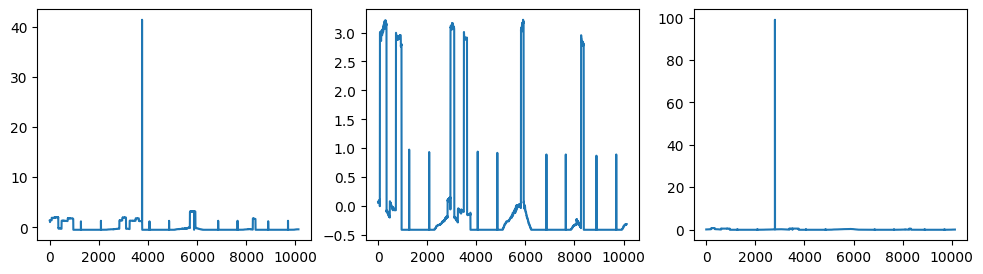

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(12, 3))
plt.subplot(1,3,1)
project_df.S1Light.plot()
plt.subplot(1,3,2)
project_df.S2Light.plot(ax=plt.gca())
plt.subplot(1,3,3)
project_df.S3Light.plot(ax=plt.gca())
plt.show()

# CO2

<AxesSubplot: >

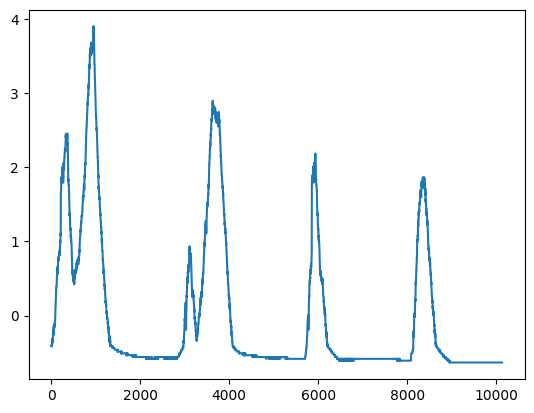

In [6]:
project_df['CO2'].plot()

# PIR

/tmp/ipykernel_283135/3791813093.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)
/tmp/ipykernel_283135/3791813093.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


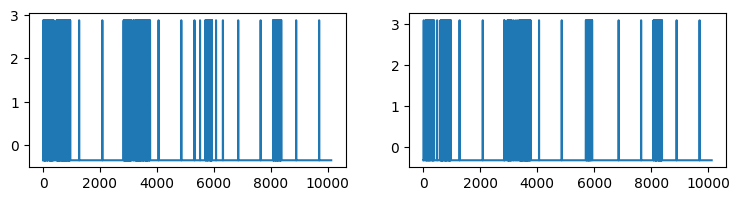

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(9, 2))
plt.subplot(1,2,1)
project_df.PIR1.plot()
plt.subplot(1,2,2)
project_df.PIR2.plot(ax=plt.gca())
plt.show()

# Removing Basic Outliers

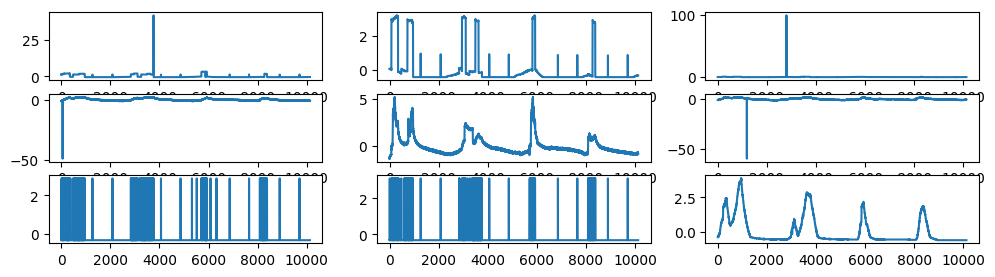

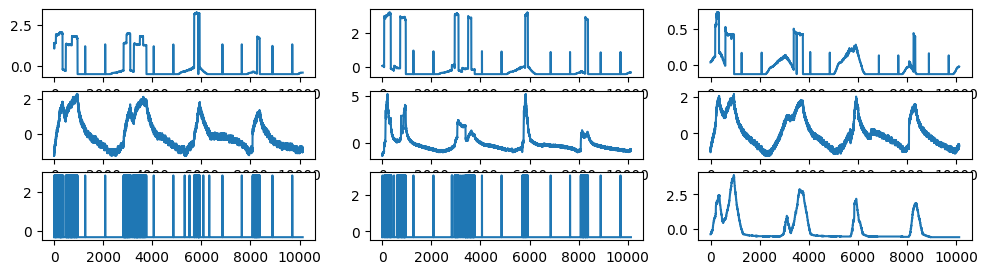

In [8]:
# FIGURE
fig, axs = plt.subplots(3, 3, figsize=(12, 3))
# LIGHT
plt.subplot(3,3,1)
project_df.S1Light.plot()
plt.subplot(3,3,2)
project_df.S2Light.plot(ax=plt.gca())
plt.subplot(3,3,3)
project_df.S3Light.plot(ax=plt.gca())
# TEMP
plt.subplot(3,3,4)
project_df.S1Temp.plot()
plt.subplot(3,3,5)
project_df.S2Temp.plot(ax=plt.gca())
plt.subplot(3,3,6)
project_df.S3Temp.plot(ax=plt.gca())
# PIR
plt.subplot(3,3,7)
project_df.PIR1.plot()
plt.subplot(3,3,8)
project_df.PIR2.plot(ax=plt.gca())
# CO2
plt.subplot(3,3,9)
project_df.CO2.plot(ax=plt.gca())
plt.show()

outliers = getOutliersFromAverage(project_df, 6)
new_project_df = removeLine(project_df, outliers)
new_output_df = removeLine(df_output, outliers)

# FIGURE
fig, axs = plt.subplots(3, 3, figsize=(12, 3))
# LIGHT
plt.subplot(3,3,1)
new_project_df.S1Light.plot()
plt.subplot(3,3,2)
new_project_df.S2Light.plot(ax=plt.gca())
plt.subplot(3,3,3)
new_project_df.S3Light.plot(ax=plt.gca())
# TEMP
plt.subplot(3,3,4)
new_project_df.S1Temp.plot()
plt.subplot(3,3,5)
new_project_df.S2Temp.plot(ax=plt.gca())
plt.subplot(3,3,6)
new_project_df.S3Temp.plot(ax=plt.gca())
# PIR
plt.subplot(3,3,7)
new_project_df.PIR1.plot()
plt.subplot(3,3,8)
new_project_df.PIR2.plot(ax=plt.gca())
# CO2
plt.subplot(3,3,9)
new_project_df.CO2.plot(ax=plt.gca())
plt.show()


# Analysis

Nearest Neighbors

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1594
           1       1.00      0.97      0.98        92
           2       0.94      0.98      0.96       177
           3       0.97      0.93      0.95       162

    accuracy                           0.99      2025
   macro avg       0.98      0.97      0.97      2025
weighted avg       0.99      0.99      0.99      2025


Linear SVM

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1594
           1       1.00      0.98      0.99        92
           2       0.90      0.92      0.91       177
           3       0.89      0.81      0.85       162

    accuracy                           0.98      2025
   macro avg       0.94      0.93      0.93      2025
weighted avg       0.97      0.98      0.97      2025


RBF SVM

              precision    recall  f1-score   support

           0       1.00      1.00

/media/brunomcebola/Data/Faculdade/5º ano 1º trimestre/CInt/CInt-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Net

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1594
           1       1.00      0.98      0.99        92
           2       0.98      0.90      0.94       177
           3       0.89      0.91      0.90       162

    accuracy                           0.98      2025
   macro avg       0.96      0.95      0.96      2025
weighted avg       0.98      0.98      0.98      2025


Naive Bayes

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1594
           1       1.00      0.96      0.98        92
           2       0.84      0.70      0.76       177
           3       0.57      0.81      0.67       162

    accuracy                           0.93      2025
   macro avg       0.85      0.86      0.85      2025
weighted avg       0.95      0.93      0.94      2025




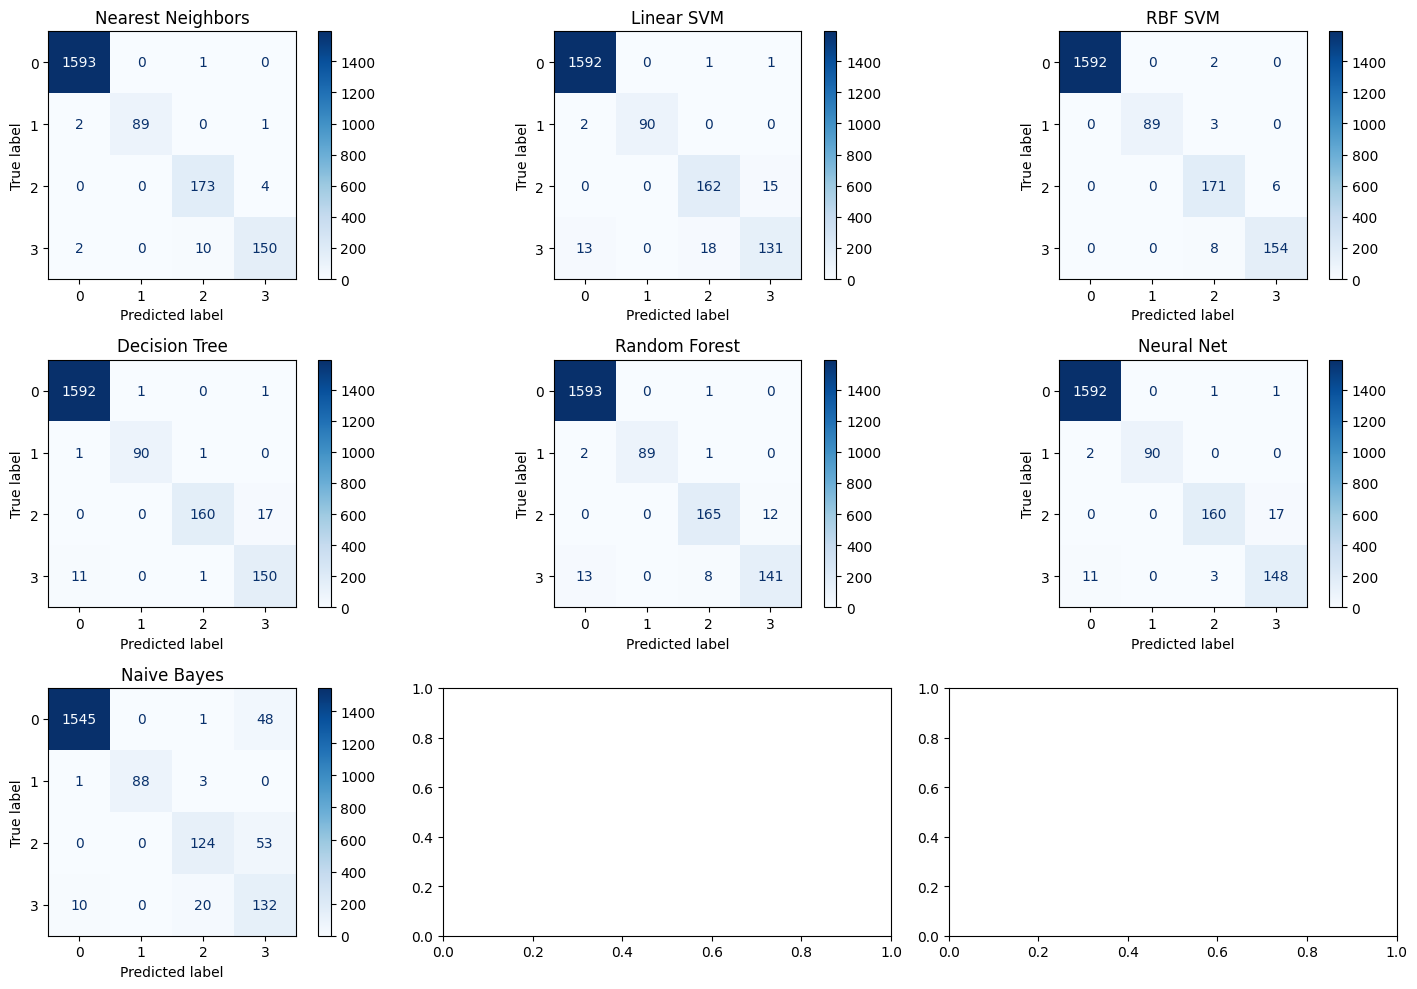

In [15]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "Naive Bayes"
]

classifiers = [
    KNeighborsClassifier(4),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),  # type: ignore
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),  # type: ignore
    MLPClassifier(alpha=1, max_iter=100),
    GaussianNB()
]

# preprocess dataset, split into training and test part
X = new_project_df.to_numpy()
y = new_output_df.to_numpy()

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

for name, clf, ax in zip(names, classifiers, axes.flatten()): # type: ignore
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=mpl.cm.Blues, ax=ax)
    
    ax.title.set_text(name)
    
    print(name)
    print()
    print(classification_report(y_test, y_pred))
    print()

plt.tight_layout()
plt.show()


In [14]:
print(new_output_df[new_output_df == 0].shape[0])
print(new_output_df[new_output_df == 1].shape[0])
print(new_output_df[new_output_df == 2].shape[0])
print(new_output_df[new_output_df == 3].shape[0])

7992
467
881
781
